In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams, figure
rcParams['figure.figsize'] = 15,9
# figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
file1 = 'US Coffee C Futures Historical Data.csv'
table1 = pd.read_csv(file1)
table1

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2000",86.45,86.80,87.50,86.00,2.63K,0.17%
1,"Aug 01, 2000",86.30,86.50,87.75,86.10,2.74K,-0.17%
2,"Jul 31, 2000",86.45,85.75,87.00,84.10,3.99K,-1.09%
3,"Jul 28, 2000",87.40,86.75,88.10,86.75,2.48K,1.51%
4,"Jul 27, 2000",86.10,86.60,88.75,86.00,3.89K,-0.98%
5,"Jul 26, 2000",86.95,85.00,87.50,85.00,3.20K,2.05%
6,"Jul 25, 2000",85.20,85.50,87.25,85.00,4.75K,-1.27%
7,"Jul 24, 2000",86.30,87.00,89.00,84.40,10.79K,-10.71%
8,"Jul 21, 2000",96.65,99.50,103.25,96.25,7.27K,-1.13%
9,"Jul 20, 2000",97.75,100.00,104.00,95.35,10.47K,-12.06%


In [3]:
file2 = 'US Coffee C Futures Historical Data2.csv'
table2 = pd.read_csv(file2)
table2

,Date,Price,Open,High,Low,Vol.,Change %
0,"Sep 26, 2019",101.78,101.18,102.90,100.63,-,0.82%
1,"Sep 25, 2019",100.95,98.90,101.55,97.25,24.94K,1.82%
2,"Sep 24, 2019",99.15,98.85,100.35,98.45,13.62K,0.15%
3,"Sep 23, 2019",99.00,98.50,100.90,98.15,17.16K,0.61%
4,"Sep 20, 2019",98.40,98.50,99.75,98.05,22.02K,0.05%
5,"Sep 19, 2019",98.35,100.35,100.75,98.10,17.60K,-2.31%
6,"Sep 18, 2019",100.68,100.83,101.83,100.13,-,0.08%
7,"Sep 17, 2019",100.60,103.60,104.05,99.98,-,-3.11%
8,"Sep 16, 2019",103.83,102.00,104.90,101.68,-,1.32%
9,"Sep 13, 2019",102.48,103.23,103.60,102.08,-,-0.97%


In [4]:
file3 = 'US Coffee C Futures Historical Data3.csv'
table3 = pd.read_csv(file3)
table3

,Date,Price,Open,High,Low,Vol.,Change %
0,"Sep 27, 2000",78.95,81.25,81.85,78.20,7.09K,-3.43%
1,"Sep 26, 2000",81.75,79.50,82.20,79.50,6.52K,3.42%
2,"Sep 25, 2000",79.05,78.25,79.10,78.20,1.92K,1.35%
3,"Sep 22, 2000",78.00,78.25,78.95,77.40,3.61K,0.26%
4,"Sep 21, 2000",77.80,78.30,79.15,77.60,4.58K,-1.71%
5,"Sep 20, 2000",79.15,80.25,81.25,78.00,7.98K,2.53%
6,"Sep 19, 2000",77.20,76.50,77.00,77.00,-,-0.26%
7,"Sep 18, 2000",77.40,75.00,77.50,77.00,0.01K,1.51%
8,"Sep 15, 2000",76.25,76.25,77.75,76.00,0.05K,-1.23%
9,"Sep 14, 2000",77.20,79.00,78.00,76.50,0.01K,-2.95%


In [5]:
data_frames = [table1,table2,table3]
df = pd.concat(data_frames)
df = df.drop_duplicates()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2000",86.45,86.80,87.50,86.00,2.63K,0.17%
1,"Aug 01, 2000",86.30,86.50,87.75,86.10,2.74K,-0.17%
2,"Jul 31, 2000",86.45,85.75,87.00,84.10,3.99K,-1.09%
3,"Jul 28, 2000",87.40,86.75,88.10,86.75,2.48K,1.51%
4,"Jul 27, 2000",86.10,86.60,88.75,86.00,3.89K,-0.98%
5,"Jul 26, 2000",86.95,85.00,87.50,85.00,3.20K,2.05%
6,"Jul 25, 2000",85.20,85.50,87.25,85.00,4.75K,-1.27%
7,"Jul 24, 2000",86.30,87.00,89.00,84.40,10.79K,-10.71%
8,"Jul 21, 2000",96.65,99.50,103.25,96.25,7.27K,-1.13%
9,"Jul 20, 2000",97.75,100.00,104.00,95.35,10.47K,-12.06%


In [29]:
df['Date']=df['Date'].astype(str)
df['Date']=pd.to_datetime(df['Date'])
df = df.set_index(['Date'])
df.groupby(pd.Grouper(key="Date", freq='D'))



KeyError: 'Date'

In [7]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-08-02,86.45,86.80,87.50,86.00,2.63K,0.17%
2000-08-01,86.30,86.50,87.75,86.10,2.74K,-0.17%
2000-07-31,86.45,85.75,87.00,84.10,3.99K,-1.09%
2000-07-28,87.40,86.75,88.10,86.75,2.48K,1.51%
2000-07-27,86.10,86.60,88.75,86.00,3.89K,-0.98%
2000-07-26,86.95,85.00,87.50,85.00,3.20K,2.05%
2000-07-25,85.20,85.50,87.25,85.00,4.75K,-1.27%
2000-07-24,86.30,87.00,89.00,84.40,10.79K,-10.71%
2000-07-21,96.65,99.50,103.25,96.25,7.27K,-1.13%


In [8]:
df.sort_index(inplace=True)
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1980-08-26,130.75,130.62,132.00,124.50,0.29K,2.28%
1980-08-27,131.08,131.50,132.00,127.50,0.33K,0.25%
1980-08-28,130.22,128.12,130.50,127.25,0.16K,-0.66%
1980-08-29,128.00,126.25,128.90,125.50,0.08K,-1.70%
1980-09-02,125.57,124.62,125.75,123.10,0.14K,-1.90%
1980-09-03,127.25,124.37,127.49,124.00,0.37K,1.34%
1980-09-04,127.00,126.67,127.10,125.50,0.08K,-0.20%
1980-09-05,128.00,128.00,128.00,126.25,0.11K,0.79%
1980-09-08,134.39,126.55,135.00,126.55,0.11K,4.99%


In [9]:
# Select only price

df = df.loc[:,['Price']]

/home/erolerten/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


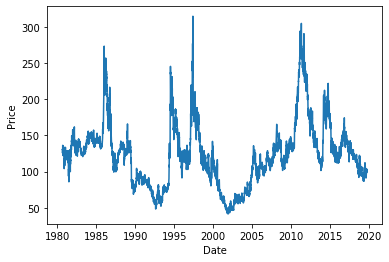

In [10]:
# Plot graph first

# plot graph

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df)


In [11]:
# Determining roling statistics
rolmean = df.rolling(window=365).mean()
rolstd = df.rolling(window=365).std()
print(rolmean,rolstd)

                 Price
Date                  
1980-08-26         NaN
1980-08-27         NaN
1980-08-28         NaN
1980-08-29         NaN
1980-09-02         NaN
1980-09-03         NaN
1980-09-04         NaN
1980-09-05         NaN
1980-09-08         NaN
1980-09-09         NaN
1980-09-10         NaN
1980-09-11         NaN
1980-09-12         NaN
1980-09-15         NaN
1980-09-16         NaN
1980-09-17         NaN
1980-09-18         NaN
1980-09-19         NaN
1980-09-22         NaN
1980-09-23         NaN
1980-09-24         NaN
1980-09-25         NaN
1980-09-26         NaN
1980-09-29         NaN
1980-09-30         NaN
1980-10-01         NaN
1980-10-02         NaN
1980-10-03         NaN
1980-10-06         NaN
1980-10-07         NaN
...                ...
2019-08-15  105.262438
2019-08-16  105.189973
2019-08-19  105.113671
2019-08-20  105.038603
2019-08-21  104.969288
2019-08-22  104.895452
2019-08-23  104.820521
2019-08-26  104.756137
2019-08-27  104.692712
2019-08-28  104.626548
2019-08-29 

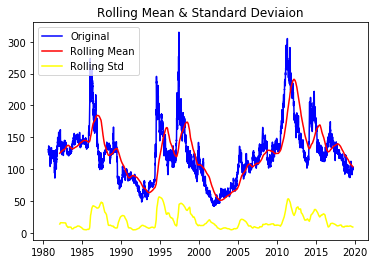

In [12]:
# Plot rolling statistics

orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolmean, color='red',label='Rolling Mean')
std = plt.plot(rolstd, color='yellow',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviaion')
plt.show(block=False)

In [13]:
# Perform Dickey-Fuller test:

print("Result of Dickey-Fuller Test:")
dftest=adfuller(df['Price'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critial Value (%s)'%key]=value
    
print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistics                  -2.953440
p-value                           0.039477
#Lags Used                       37.000000
Number of Observations Used    9821.000000
Critial Value (1%)               -3.431016
Critial Value (5%)               -2.861834
Critial Value (10%)              -2.566927
dtype: float64


In [14]:
rolmean.dropna(inplace=True)
rolstd.dropna(inplace=True)

In [15]:
def test_stationary(timeseries):
    
    # Determining rolling stats
    movingAverage = timeseries.rolling(window=365).mean()
    movingStd = timeseries.rolling(window=365).std()
    
    # Plot rolling stats
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red',label='Rolling Mean')
    std = plt.plot(movingStd, color='yellow',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviaion')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:

    print("Result of Dickey-Fuller Test:")
    dftest=adfuller(timeseries['Price'],autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critial Value (%s)'%key]=value

    print(dfoutput)

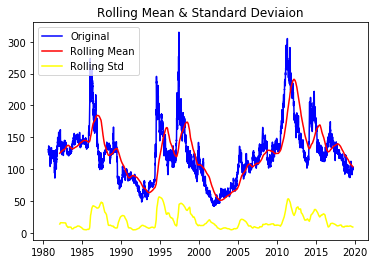

Result of Dickey-Fuller Test:
Test Statistics                  -2.953440
p-value                           0.039477
#Lags Used                       37.000000
Number of Observations Used    9821.000000
Critial Value (1%)               -3.431016
Critial Value (5%)               -2.861834
Critial Value (10%)              -2.566927
dtype: float64


In [16]:
test_stationary(df)

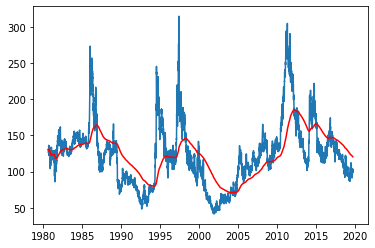

In [17]:
exponentialDecayWeightedAverage = df.ewm(halflife=365, min_periods=0,adjust=True).mean()
plt.plot(df)
plt.plot(exponentialDecayWeightedAverage,color='red')

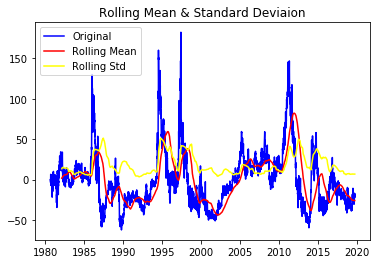

Result of Dickey-Fuller Test:
Test Statistics                  -3.792067
p-value                           0.002990
#Lags Used                       37.000000
Number of Observations Used    9821.000000
Critial Value (1%)               -3.431016
Critial Value (5%)               -2.861834
Critial Value (10%)              -2.566927
dtype: float64


In [18]:
df_minus_movingExponentialDecayAverage = df - exponentialDecayWeightedAverage
test_stationary(df_minus_movingExponentialDecayAverage)

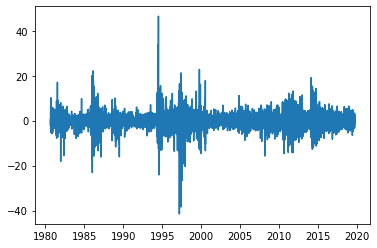

In [19]:
df_shifted = df - df.shift()
plt.plot(df_shifted)

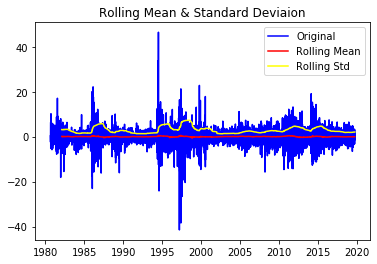

Result of Dickey-Fuller Test:
Test Statistics               -1.799001e+01
p-value                        2.756389e-30
#Lags Used                     3.600000e+01
Number of Observations Used    9.821000e+03
Critial Value (1%)            -3.431016e+00
Critial Value (5%)            -2.861834e+00
Critial Value (10%)           -2.566927e+00
dtype: float64


In [20]:
df_shifted.dropna(inplace=True)
test_stationary(df_shifted)

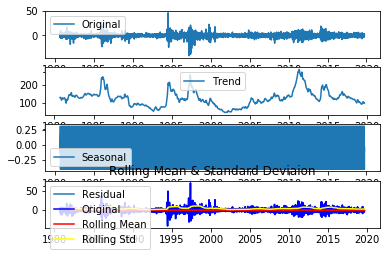

Result of Dickey-Fuller Test:
Test Statistics                 -27.671617
p-value                           0.000000
#Lags Used                       36.000000
Number of Observations Used    9792.000000
Critial Value (1%)               -3.431018
Critial Value (5%)               -2.861835
Critial Value (10%)              -2.566927
dtype: float64


In [21]:
decomposition = seasonal_decompose(df,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_shifted, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(residual)

/home/erolerten/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


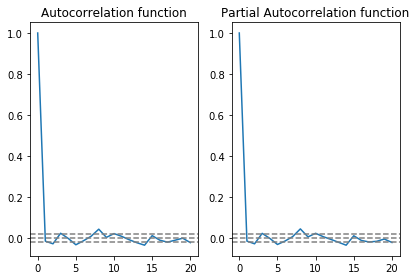

In [22]:
# ACF and PACF plots
lag_acf = acf(df_shifted, nlags=20)
lag_pacf = pacf(df_shifted,nlags=20)

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_shifted)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_shifted)),linestyle='--',color='gray')
plt.title('Autocorrelation function')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_shifted)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_shifted)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

/home/erolerten/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/erolerten/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR-Model


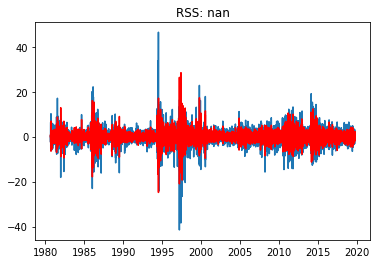

In [23]:
# AR Model
model = ARIMA(df_shifted,order=(1,1,0))
results_AR = model.fit(disp=-1)
plt.plot(df_shifted)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum(results_AR.fittedvalues-df_shifted['Price'])**2)
print("Plotting AR-Model")

/home/erolerten/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/erolerten/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: Cannot add integral value to Timestamp without freq.

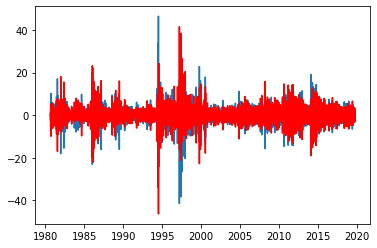

In [24]:
# MA Model

strt_date = pd.to_datetime('2014-01-01 01:00:00')
end_date = pd.to_datetime('2050-01-01 01:00:00')

model = ARIMA(df_shifted, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(df_shifted)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_shifted)**2))

In [ ]:
model = ARIMA(df_shifted, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_shifted)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_shifted)**2))